**Mounting Google Drive** 



In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**Loading the libraries.**

In [0]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt



**Setting the Display Option right.**

In [0]:
def set_pandas_display_options() :

    pd.options.display.max_columns = 1000
    pd.options.display.max_rows = 1000
    pd.options.display.max_colwidth = 199
    pd.options.display.precision = 3

set_pandas_display_options()


**Loading the Datasets.**

In [0]:
farm = pd.read_csv('/content/drive/My Drive/farm_data.csv')

In [0]:
weather = pd.read_csv('/content/drive/My Drive/train_weather.csv')

In [0]:
train = pd.read_csv('/content/drive/My Drive/train_data.csv')

**Checking the head & shape of the farm dataset.**

In [130]:
farm.shape

(1449, 6)

In [131]:
farm.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.447,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.408,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140,Obery Farms,location 7369


*I found that there are 1449 rows and 4 columns.* 


**Checking the Null Values**

In [132]:
percent_missing = farm.isnull().sum() * 100 / len(farm)
missing_value_farm = pd.DataFrame({'column_name': farm.columns,
                                 'percent_missing': percent_missing})
missing_value_farm

,column_name,percent_missing
farm_id,farm_id,0.000
operations_commencing_year,operations_commencing_year,53.416
num_processing_plants,num_processing_plants,75.500
farm_area,farm_area,0.000
farming_company,farming_company,0.000
deidentified_location,deidentified_location,0.000


*num_processing_plants & operations_commencing_year have very high Null values so we can drop them for now.*

In [0]:
del farm['num_processing_plants']
del farm['operations_commencing_year']

In [134]:
farm.head()

,farm_id,farm_area,farming_company,deidentified_location
0,fid_110884,690.455,Obery Farms,location 7369
1,fid_90053,252.696,Obery Farms,location 7369
2,fid_17537,499.447,Obery Farms,location 7369
3,fid_110392,2200.408,Obery Farms,location 7369
4,fid_62402,10833.140,Obery Farms,location 7369


**Checking the datatypes of the variables.**

In [135]:
farm.dtypes

farm_id                   object
farm_area                float64
farming_company           object
deidentified_location     object
dtype: object

**Using describe to get some informantion about the dataset.**

In [136]:
farm.describe(include='all')

,farm_id,farm_area,farming_company,deidentified_location
count,1449,1449.000,1449,1449
unique,1434,NaN,16,16
top,fid_68761,NaN,Obery Farms,location 5290
freq,2,NaN,549,274
mean,NaN,8557.460,NaN,NaN
std,NaN,10290.861,NaN,NaN
min,NaN,26.292,NaN,NaN
25%,NaN,2137.884,NaN,NaN
50%,NaN,5357.995,NaN,NaN
75%,NaN,10746.647,NaN,NaN




1.   farm_id (fid_29387) is the most occured one.
2.   farm_area starts with 26.292 and ends on 81290, which is highly skewed we will check more during visualization.
3. Obey Farm is the top in farming_company with 549 frequency.
4. from Deidentified_location location 5290 tops with 274 counts.



In [137]:
weather.shape

(139773, 9)

In [138]:
weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


*In weather data we have 139773 rows and 9 columns.*

**Checking the null values for weather data.**

In [139]:
percent_missing = weather.isnull().sum() * 100 / len(weather)
missing_value_weather = pd.DataFrame({'column_name': weather.columns,
                                 'percent_missing': percent_missing})
missing_value_weather

,column_name,percent_missing
timestamp,timestamp,0.000
deidentified_location,deidentified_location,0.000
temp_obs,temp_obs,0.039
cloudiness,cloudiness,49.490
wind_direction,wind_direction,4.484
dew_temp,dew_temp,0.081
pressure_sea_level,pressure_sea_level,7.597
precipitation,precipitation,35.979
wind_speed,wind_speed,0.217


*We have null values in cloudiness, wind_direction, pressure_sea_level and precipitation.
We wont drop them, we can impute them or do fillna.*

In [0]:
weather = weather.fillna(method = 'ffill').fillna(method = 'bfill')

**Chceking the datatypes.**

In [141]:
weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

*As it is a timpestamp date we can extract the date using DatetimeIndex.
This feature will help us to merge the different datasets later on.* 

In [0]:
weather['Date'] = pd.DatetimeIndex(weather['timestamp']).date


In [143]:
weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Date
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,-1.0,0.0,2016-01-01
1,2016-01-01 01:00:00,location 7369,24.4,6.0,70.0,21.1,1020.2,-1.0,1.5,2016-01-01
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0,2016-01-01
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0,2016-01-01
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6,2016-01-01


In [144]:
weather.describe(include= 'all')

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed,Date
count,139773,139773,139773.000,139773.000,139773.000,139773.000,139773.000,139773.000,139773.000,139773
unique,8784,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,366
top,2016-11-11 23:00:00,location 7369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-11-07
freq,16,8784,NaN,NaN,NaN,NaN,NaN,NaN,NaN,384
mean,NaN,NaN,14.419,2.835,179.132,7.348,1015.971,2.482,3.559,NaN
std,NaN,NaN,10.626,3.157,111.831,9.789,7.419,13.202,2.335,NaN
min,NaN,NaN,-28.900,0.000,0.000,-35.000,968.200,-1.000,0.000,NaN
25%,NaN,NaN,7.200,0.000,80.000,0.600,1012.100,0.000,2.100,NaN
50%,NaN,NaN,15.000,2.000,190.000,8.300,1015.800,0.000,3.100,NaN
75%,NaN,NaN,22.200,6.000,280.000,14.400,1020.400,0.000,5.000,NaN


*After doing describe on weather data we can just see how the different parameters of the weather are varied. We can observe that there no invalid values in data. All the parameters are spread nicely.*

**Using GroupBy:**

In [145]:
weather_gb = weather.groupby(['Date','deidentified_location'], as_index=False).mean()
weather_gb

,Date,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,location 1784,-12.239,0.000,246.957,-16.717,1035.743,0.000,2.870
1,2016-01-01,location 2532,-6.229,5.583,256.250,-10.283,1020.217,0.000,4.738
2,2016-01-01,location 4525,-1.842,0.000,246.250,-3.271,1012.554,2.083,3.000
3,2016-01-01,location 5150,-1.357,4.000,282.857,-3.000,1012.400,-1.000,4.407
4,2016-01-01,location 5290,6.679,7.750,314.167,-0.650,1020.625,0.000,4.133
...,...,...,...,...,...,...,...,...,...
5851,2016-12-31,location 7048,9.346,6.000,232.500,6.075,1025.783,5.000,7.250
5852,2016-12-31,location 7369,12.454,3.750,245.000,3.058,1023.842,0.000,2.817
5853,2016-12-31,location 8421,14.750,3.250,140.417,6.412,1014.954,-0.167,1.742
5854,2016-12-31,location 868,-12.017,9.000,163.043,-14.139,1011.261,2.652,3.213


*As the weather data is on daily basis we can use groupby on that. So On weather data i used groupby on Date & unindentified_location and took the mean over it. We can also take median, ill try that during modelling part to check the error how it changes with mean and median.*

In [146]:
train.head()

,date,farm_id,ingredient_type,yield
0,2016-01-01 00:00:00,fid_110884,ing_w,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.0


In [147]:
train.shape

(20216100, 4)

*Train data is the biggest amongst the three with more than 2 crore rows and 4 columns. This is also timestamp data, so we need extract the date part from it.*

In [0]:
train['Date'] = pd.DatetimeIndex(train['date']).date

In [149]:
train.dtypes

date                object
farm_id             object
ingredient_type     object
yield              float64
Date                object
dtype: object

In [150]:
train.describe(include= 'all')

,date,farm_id,ingredient_type,yield,Date
count,20216100,20216100,20216100,2.022e+07,20216100
unique,8784,1434,4,NaN,366
top,2016-12-27 22:00:00,fid_63700,ing_w,NaN,2016-12-14
freq,2370,51227,12060910,NaN,56767
mean,NaN,NaN,NaN,2.117e+03,NaN
std,NaN,NaN,NaN,1.532e+05,NaN
min,NaN,NaN,NaN,0.000e+00,NaN
25%,NaN,NaN,NaN,1.830e+01,NaN
50%,NaN,NaN,NaN,7.878e+01,NaN
75%,NaN,NaN,NaN,2.680e+02,NaN




1. The target variable is yield which is very highly skewed.
2. we have 4 ingredient types.



**Finding the missing values:**

In [151]:
percent_missing = train.isnull().sum() * 100 / len(train)
missing_value_train = pd.DataFrame({'column_name': train.columns,
                                 'percent_missing': percent_missing})
missing_value_train

,column_name,percent_missing
date,date,0.0
farm_id,farm_id,0.0
ingredient_type,ingredient_type,0.0
yield,yield,0.0
Date,Date,0.0


*Doing groupby on Date, Farm_id and ingredient_type.Ill change few things during model building and compare the errors.*

In [152]:

train_gb= train.groupby(['Date', 'farm_id', 'ingredient_type'], as_index=False).mean()
train_gb.head()

,Date,farm_id,ingredient_type,yield
0,2016-01-01,fid_100053,ing_w,38.896
1,2016-01-01,fid_100107,ing_w,208.382
2,2016-01-01,fid_100107,ing_x,14.383
3,2016-01-01,fid_100107,ing_y,7050.945
4,2016-01-01,fid_100135,ing_w,25.872


**Merging:**

*First will merge farm data with train groupby data on farm_id.
Than we merge the merged data with groupby of weather on location and date.*

In [0]:
abc = pd.merge(farm, train_gb, on = 'farm_id')

In [0]:
final_train = pd.merge(abc, weather_gb, on = ['deidentified_location', 'Date'])

In [156]:
final_train.tail()

,farm_id,farm_area,farming_company,deidentified_location,Date,ingredient_type,yield,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
850392,fid_58769,8659.117,Obery Farms,location 868,2016-01-13,ing_x,0.000,-10.446,9.0,253.75,-13.733,1006.663,8.167,6.033
850393,fid_58769,8659.117,Obery Farms,location 868,2016-01-13,ing_z,247.826,-10.446,9.0,253.75,-13.733,1006.663,8.167,6.033
850394,fid_117010,11857.396,Obery Farms,location 868,2016-01-13,ing_w,410.667,-10.446,9.0,253.75,-13.733,1006.663,8.167,6.033
850395,fid_117010,11857.396,Obery Farms,location 868,2016-01-13,ing_x,0.000,-10.446,9.0,253.75,-13.733,1006.663,8.167,6.033
850396,fid_117010,11857.396,Obery Farms,location 868,2016-01-13,ing_z,292.903,-10.446,9.0,253.75,-13.733,1006.663,8.167,6.033


In [157]:
final_train.shape

(850397, 14)

*So our final train data has more than 8.5 lac rows and 14 columns.*

In [158]:
final_train.dtypes

farm_id                   object
farm_area                float64
farming_company           object
deidentified_location     object
Date                      object
ingredient_type           object
yield                    float64
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

In [159]:
percent_missing = final_train.isnull().sum() * 100 / len(final_train)
missing_value_df = pd.DataFrame({'column_name': final_train.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
farm_id,farm_id,0.0
farm_area,farm_area,0.0
farming_company,farming_company,0.0
deidentified_location,deidentified_location,0.0
Date,Date,0.0
ingredient_type,ingredient_type,0.0
yield,yield,0.0
temp_obs,temp_obs,0.0
cloudiness,cloudiness,0.0
wind_direction,wind_direction,0.0


*Checking the unique values in our final train data.*



In [160]:
output_lambda = final_train.apply(lambda x: [x.nunique()])
output_lambda


farm_id                    [1434]
farm_area                  [1397]
farming_company              [16]
deidentified_location        [16]
Date                        [366]
ingredient_type               [4]
yield                    [637195]
temp_obs                   [4555]
cloudiness                  [250]
wind_direction              [920]
dew_temp                   [4602]
pressure_sea_level         [4264]
precipitation               [358]
wind_speed                 [2759]
dtype: object

# **Visualization**

**1. Correlation:**

In [0]:
pd.options.display.float_format = '{:.2f}'.format


In [0]:
corr = final_train.corr()


In [163]:
print (corr['yield'].sort_values(ascending=False)[:6], '\n')
print (corr['yield'].sort_values(ascending=False)[-5:])


yield             1.00
farm_area         0.02
cloudiness        0.01
wind_speed        0.01
wind_direction    0.00
precipitation    -0.00
Name: yield, dtype: float64 

wind_direction        0.00
precipitation        -0.00
dew_temp             -0.00
pressure_sea_level   -0.00
temp_obs             -0.00
Name: yield, dtype: float64


1. We can see that farm_area is on the top with yield in terms of correlation.
Which is very likely as more the area more will be yield.
2. 2nd and 3rd are cloudiness and wind_speed we will check with other plots too.
3. Percipitation is negtively corelated which means more the rainfall less yield. This looks strange as rainfall is major factor, there might be some other factors depending upon which crop it is. We can always ask the domain expert and get more insights on it.

**2. Heatmap:**

In [0]:
matrix = np.triu(final_train.corr())


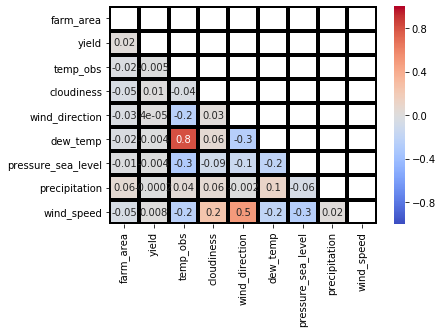

In [165]:
sns.heatmap(corr, annot= True, fmt= '.1g', vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black', mask=matrix)


heatmap provides informantion to understand in seconds which are their best performing contents and which are less performing ones.
Same thing we noticed with heatmap too. I have used half heatmap here.

In [0]:
cat_cols = [ 'farm_id', 'Date','farming_company', 'deidentified_location', 'ingredient_type' ]

In [0]:
num_cols = final_train.columns[~final_train.columns.isin(cat_cols)]
num_cols = num_cols.drop('yield')
num_cols


**3. Distribution Plot(Target):**

[Text(0, 0.5, 'Count'), Text(0.5, 0, 'Yield')]

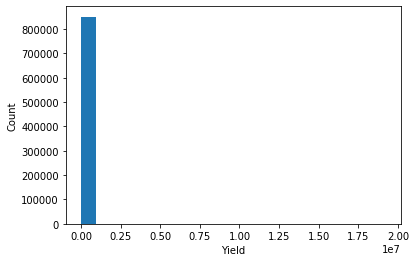

In [0]:
sns.distplot(final_train['yield'], bins = 20, kde = False, 
             hist_kws = {"alpha": 1}).set(xlabel = 'Yield', ylabel = 'Count')


In [0]:
final_train['yield'].value_counts()

0.00       53240
0.00         368
8.33         324
0.04         323
0.75         303
           ...  
171.35         1
125.03         1
64.20          1
1239.50        1
91.06          1
Name: yield, Length: 637195, dtype: int64

We can see that our target variable is highly left skewed with large number of zero values in it making it highly skewed.
We can transform this by taking log and normalize it.

**4.Distribution plot (numerical columns):**

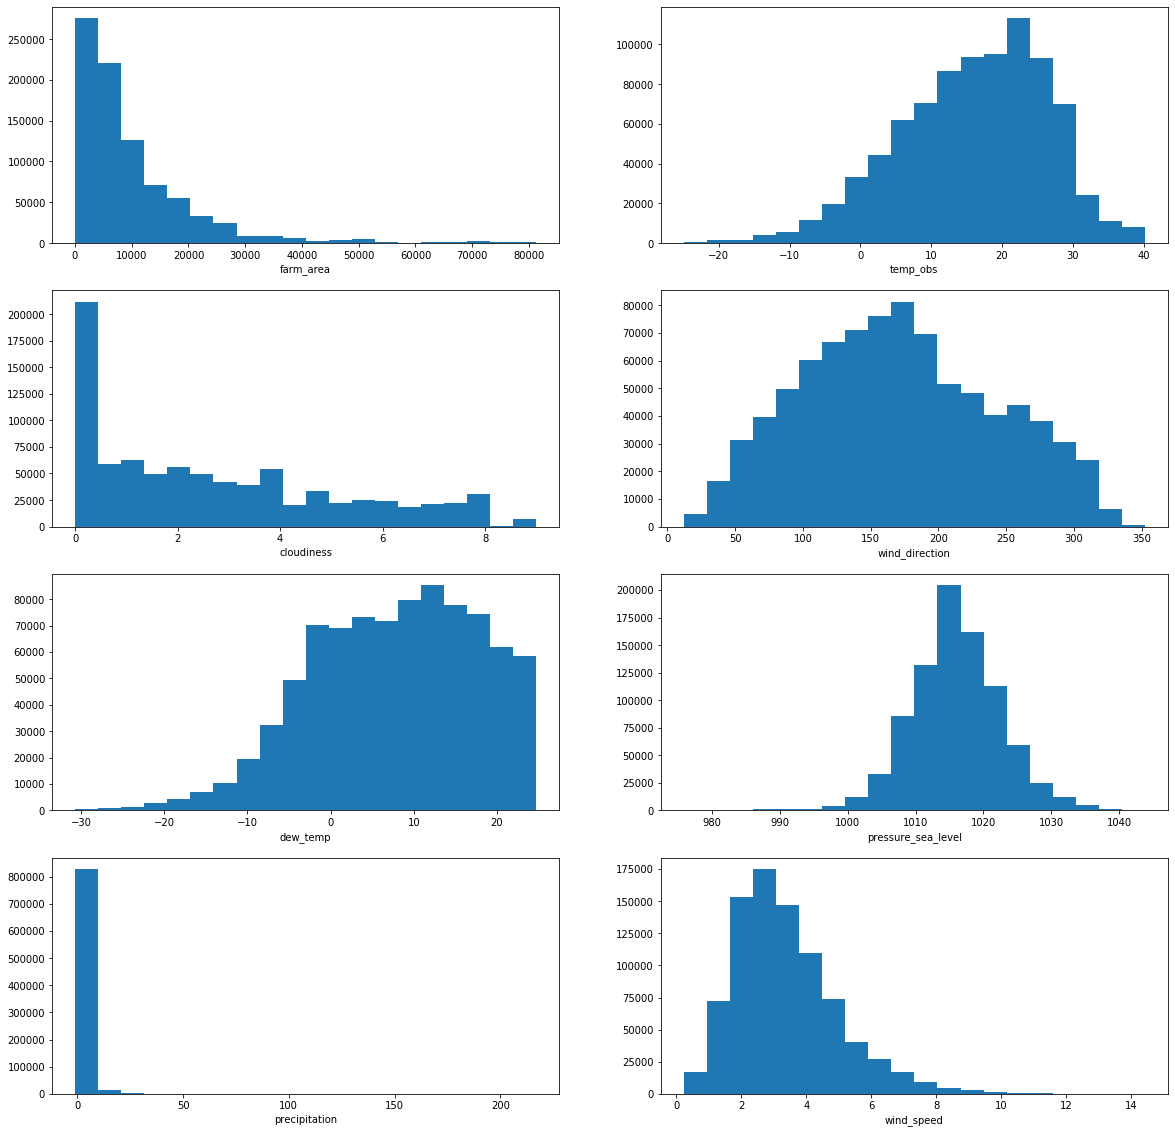

In [0]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.distplot(final_train[var], bins = 20, kde = False, ax = subplot, hist_kws = {"alpha": 1})

*As we are not able to properly visualise the distribution of near zero variance features, let us build seaborn distplot and add kernel density estimation (kde) and rug.*



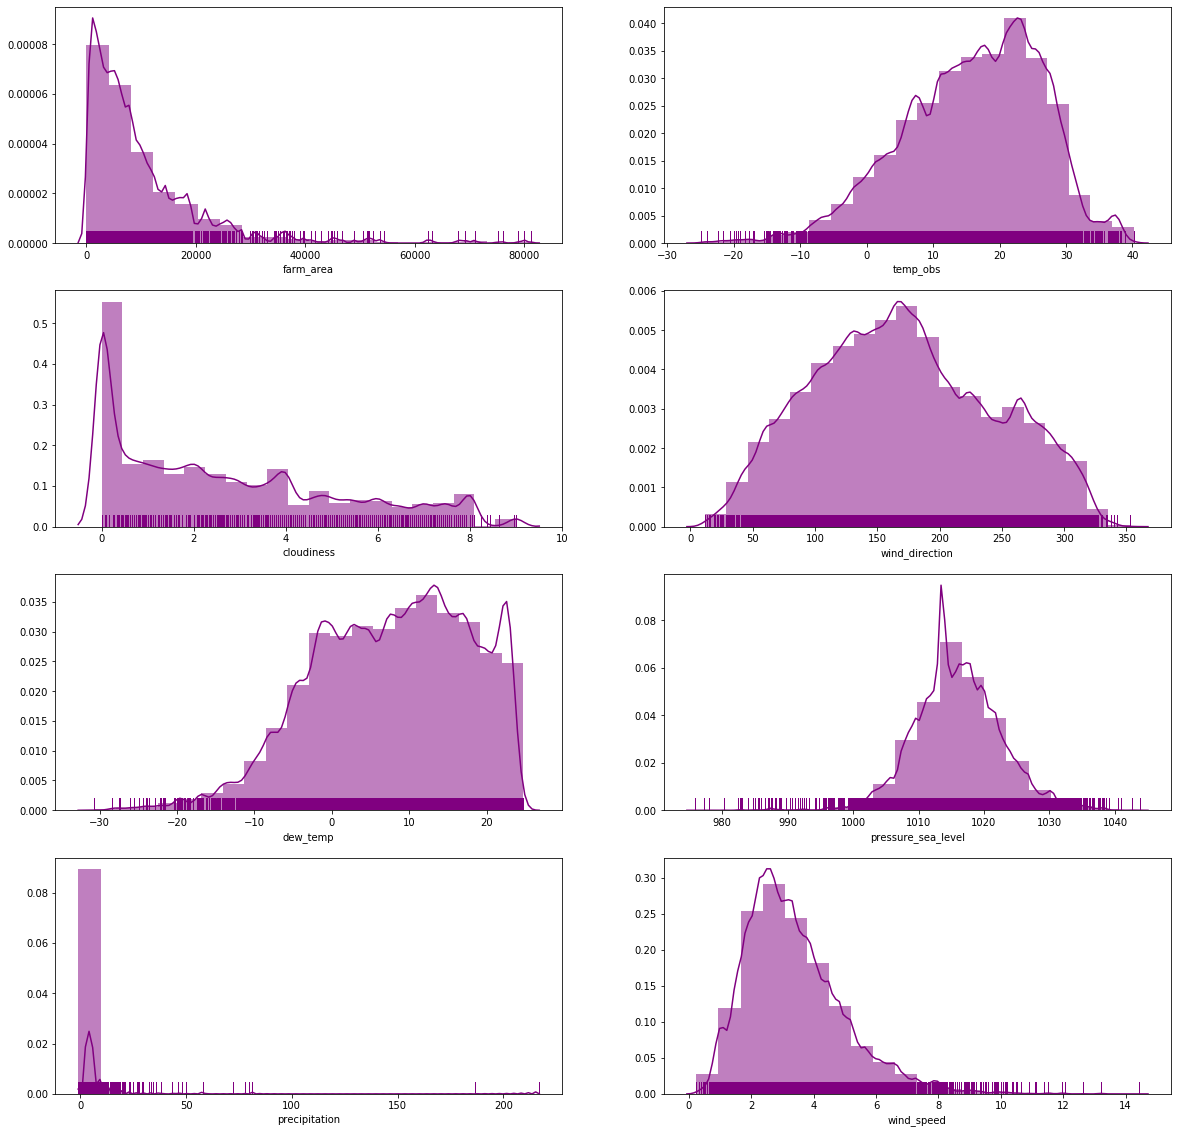

In [0]:
fig, ax = plt.subplots(4, 2, figsize = (20, 20))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.distplot(final_train[var], bins = 20, kde = True, rug = True, color = 'purple', 
                 ax = subplot, hist_kws = {"alpha": 0.5})



*  Right Skew
    1. Dew temp and Somewhat temp_obs. 
*  Left Skew
    1. Wind_Speed
    2. Percipition
    3. Cloudiness
    4. Farm_area
*  Normal
    1. Pressure_sea_level
    2. wind_direction
    



**5. Sactter Plot**

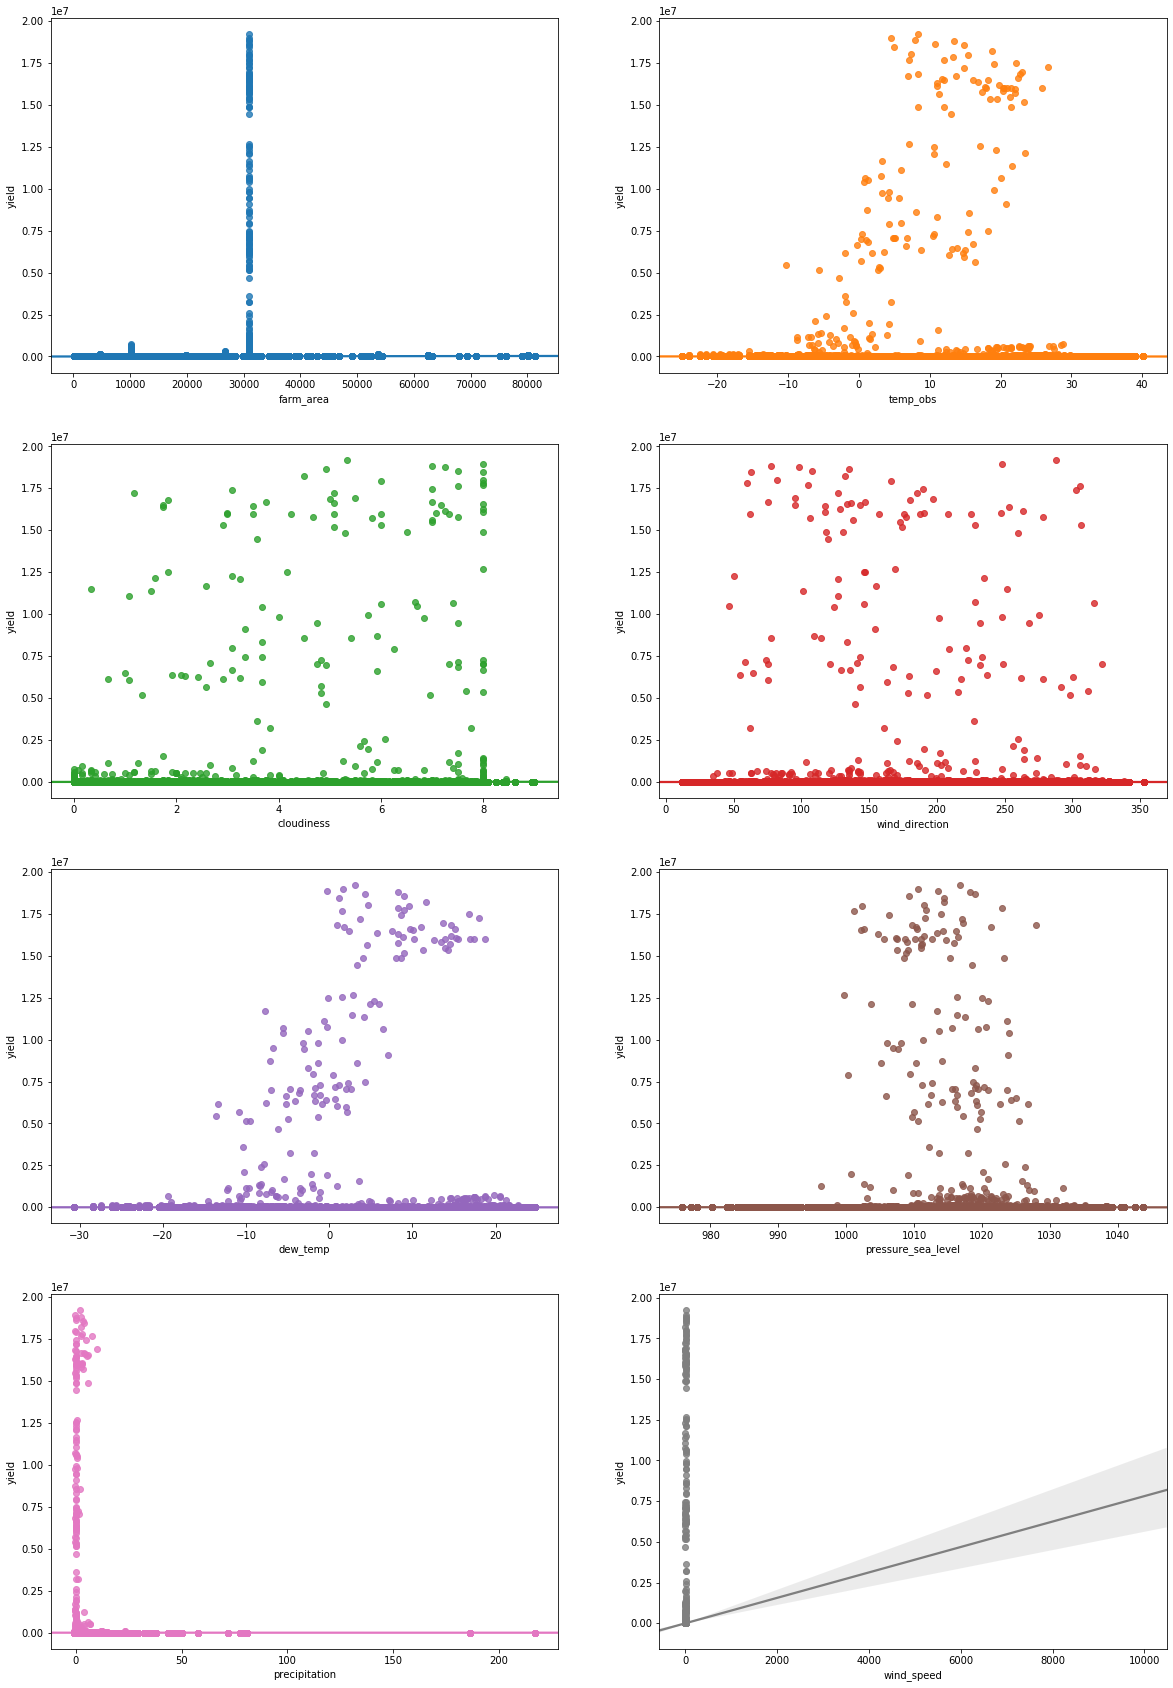

In [0]:
fig, ax = plt.subplots(4, 2, figsize = (20, 30))

for var, subplot in zip(num_cols, ax.flatten()):
    sns.regplot(x = var, y = 'yield', data = final_train, 
                ax = subplot).set(xlabel = var, ylabel = 'yield')

*Let us visualise bivariate relationship between target feature and other numeric features using scatter plot.*

*All we can see is that there are many outliers in all the columns.
No columns show perfect relationship with the target varibale.
se need to build outlier robost model that can tackle such situations.*



**6. Playing With Correlation:**

In [0]:
final_train[['yield', 'farm_area']].corr()


,yield,farm_area
yield,1.00,0.02
farm_area,0.02,1.00


In [0]:
print('# of observations : ', final_train[final_train['yield']> 50].shape[0])

df1 = final_train[final_train['yield']> 50]

df1[['farm_area', 'yield']].corr()

# of observations :  524243


,farm_area,yield
farm_area,1.00,0.03
yield,0.03,1.00


*I tired to take values higher than 50 for yield and than check the corelation with farm area but it didnt changed much infact it decreased a bit. so not tampering it for now .*

In [0]:
print('# of observations : ', final_train[final_train['farm_area']> 100].shape[0])

df1 = final_train[final_train['farm_area']> 100]

df1[['farm_area', 'yield']].corr()

# of observations :  845387


,farm_area,yield
farm_area,1.00,0.02
yield,0.02,1.00


*Same i tried with farm_area alos but nothing fruitfull happend here.*

**7. Box Plots and Count Plots:**

In [0]:
import matplotlib.pyplot as plt


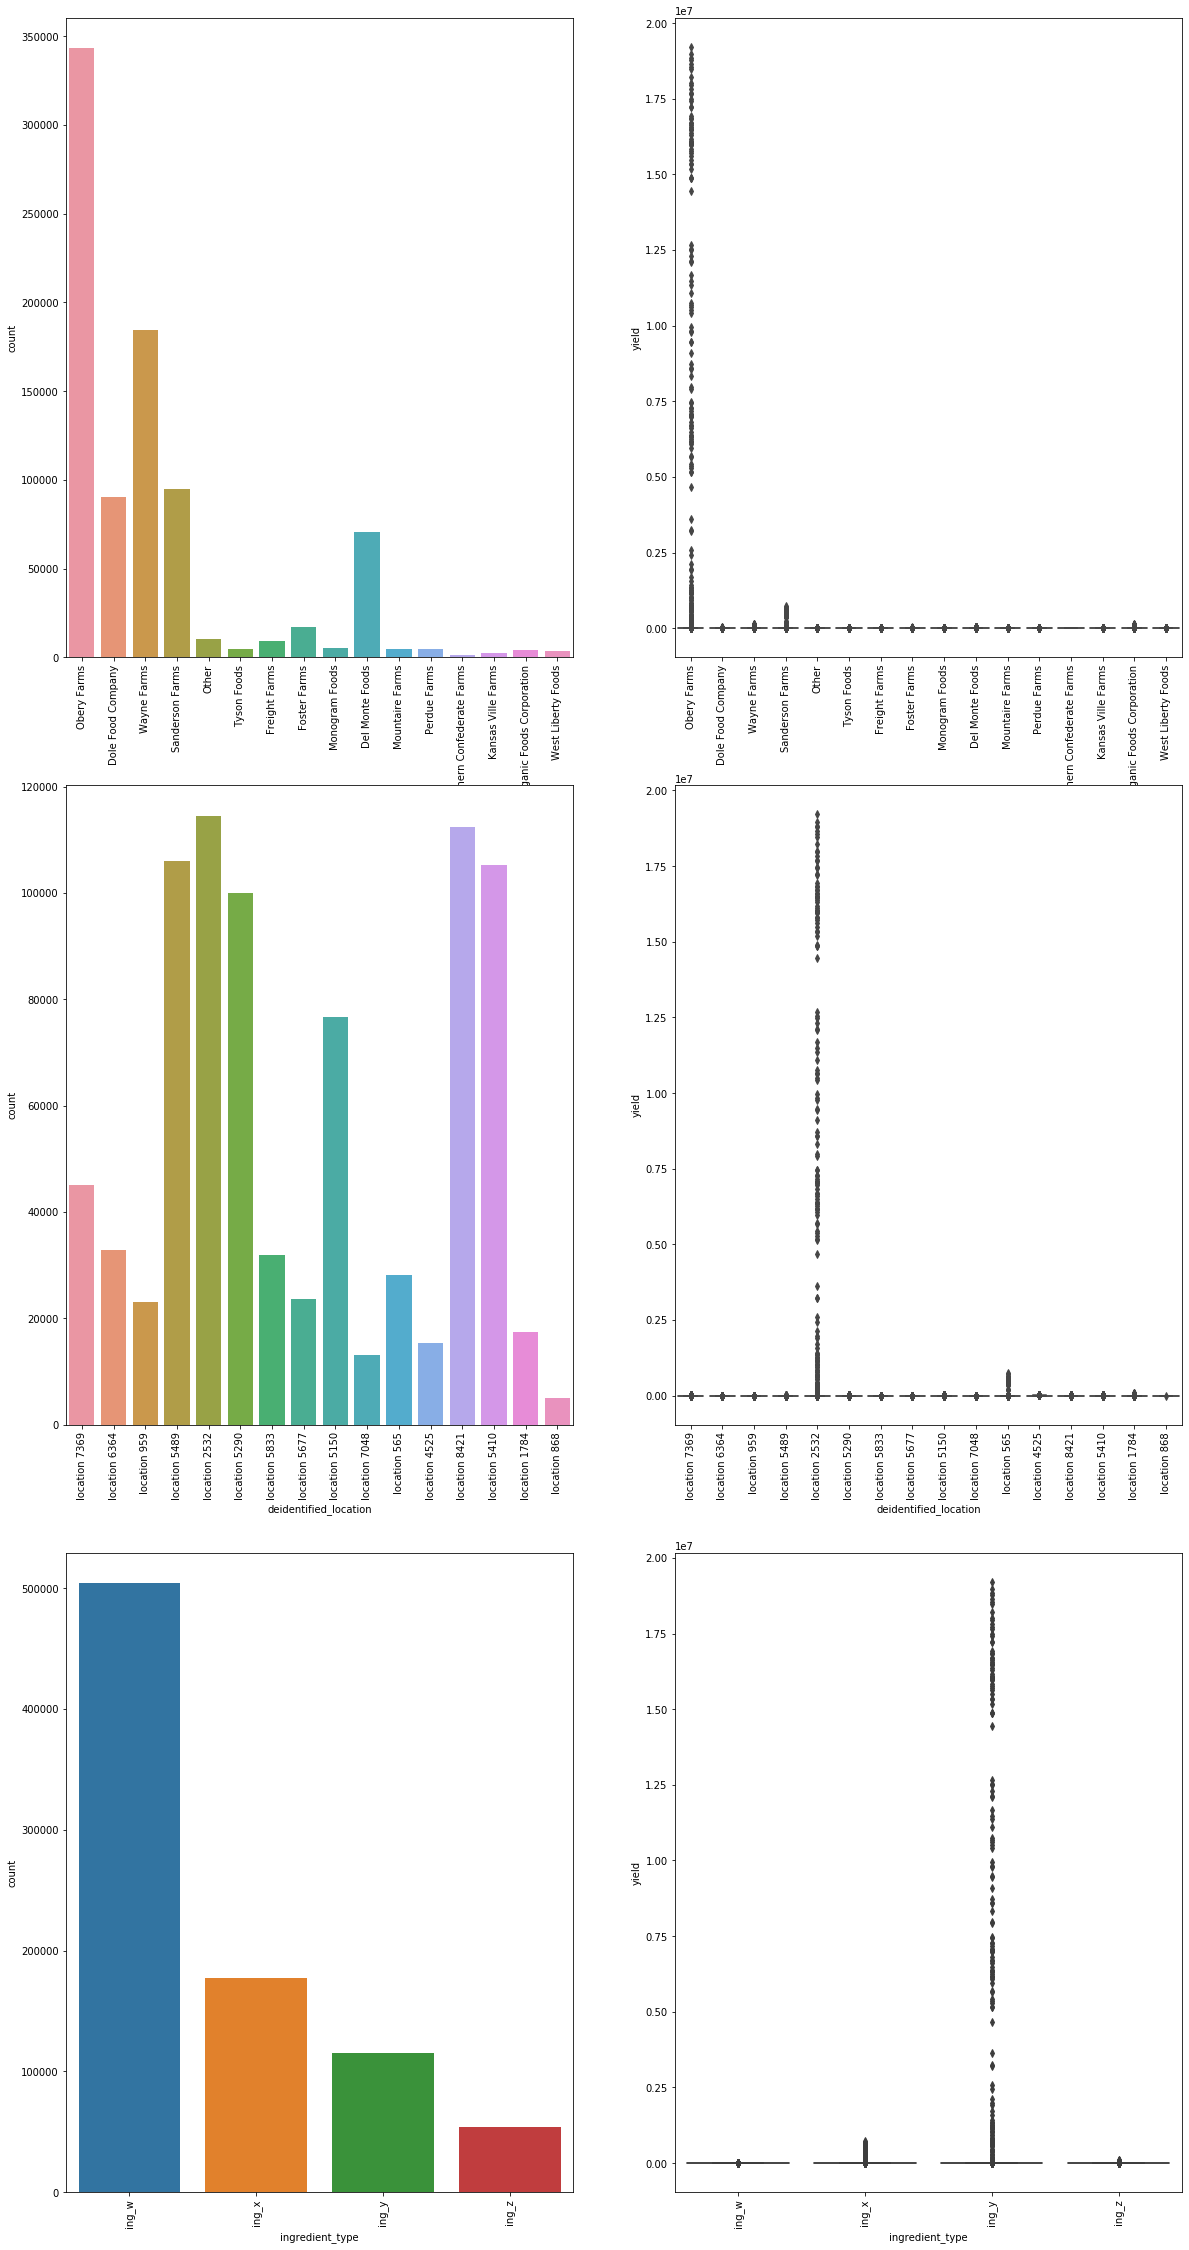

In [0]:
fig, ax = plt.subplots(3, 2, figsize = (20, 40))


for var, [subplotA, subplotB] in zip(cat_cols, ax):
    
    sns.countplot(final_train[var], ax = subplotA)
    for label in subplotA.get_xticklabels() :
        label.set_rotation(90)
        
    sns.boxplot(x = var, y = 'yield', data = final_train, ax = subplotB)
    for label in subplotB.get_xticklabels() :
        label.set_rotation(90)



*   Farming_company
     1. Obey farms have the largest counts among all and also very high outliers.
     2 .After that we have Wayne farms, Senderson Farms, Dele Food Company and Del Monte Foods.
     3. Rest have very low farms.
     4. Senderson farms too have many outliers.
*   Deindetified_location
     1. location_2532 is the highest in this and also have the largest outliers.
     2. Followed by location(8241, 5489, 5410, 5290)
     3. Location 565 also have high outliers.
*   Ingredient_type
     1. Ingredient w has the highest count followed by x, y and z.
     2. Ingredient y  has the highest outliers followed by x, z and w.


**8.PairPlot**

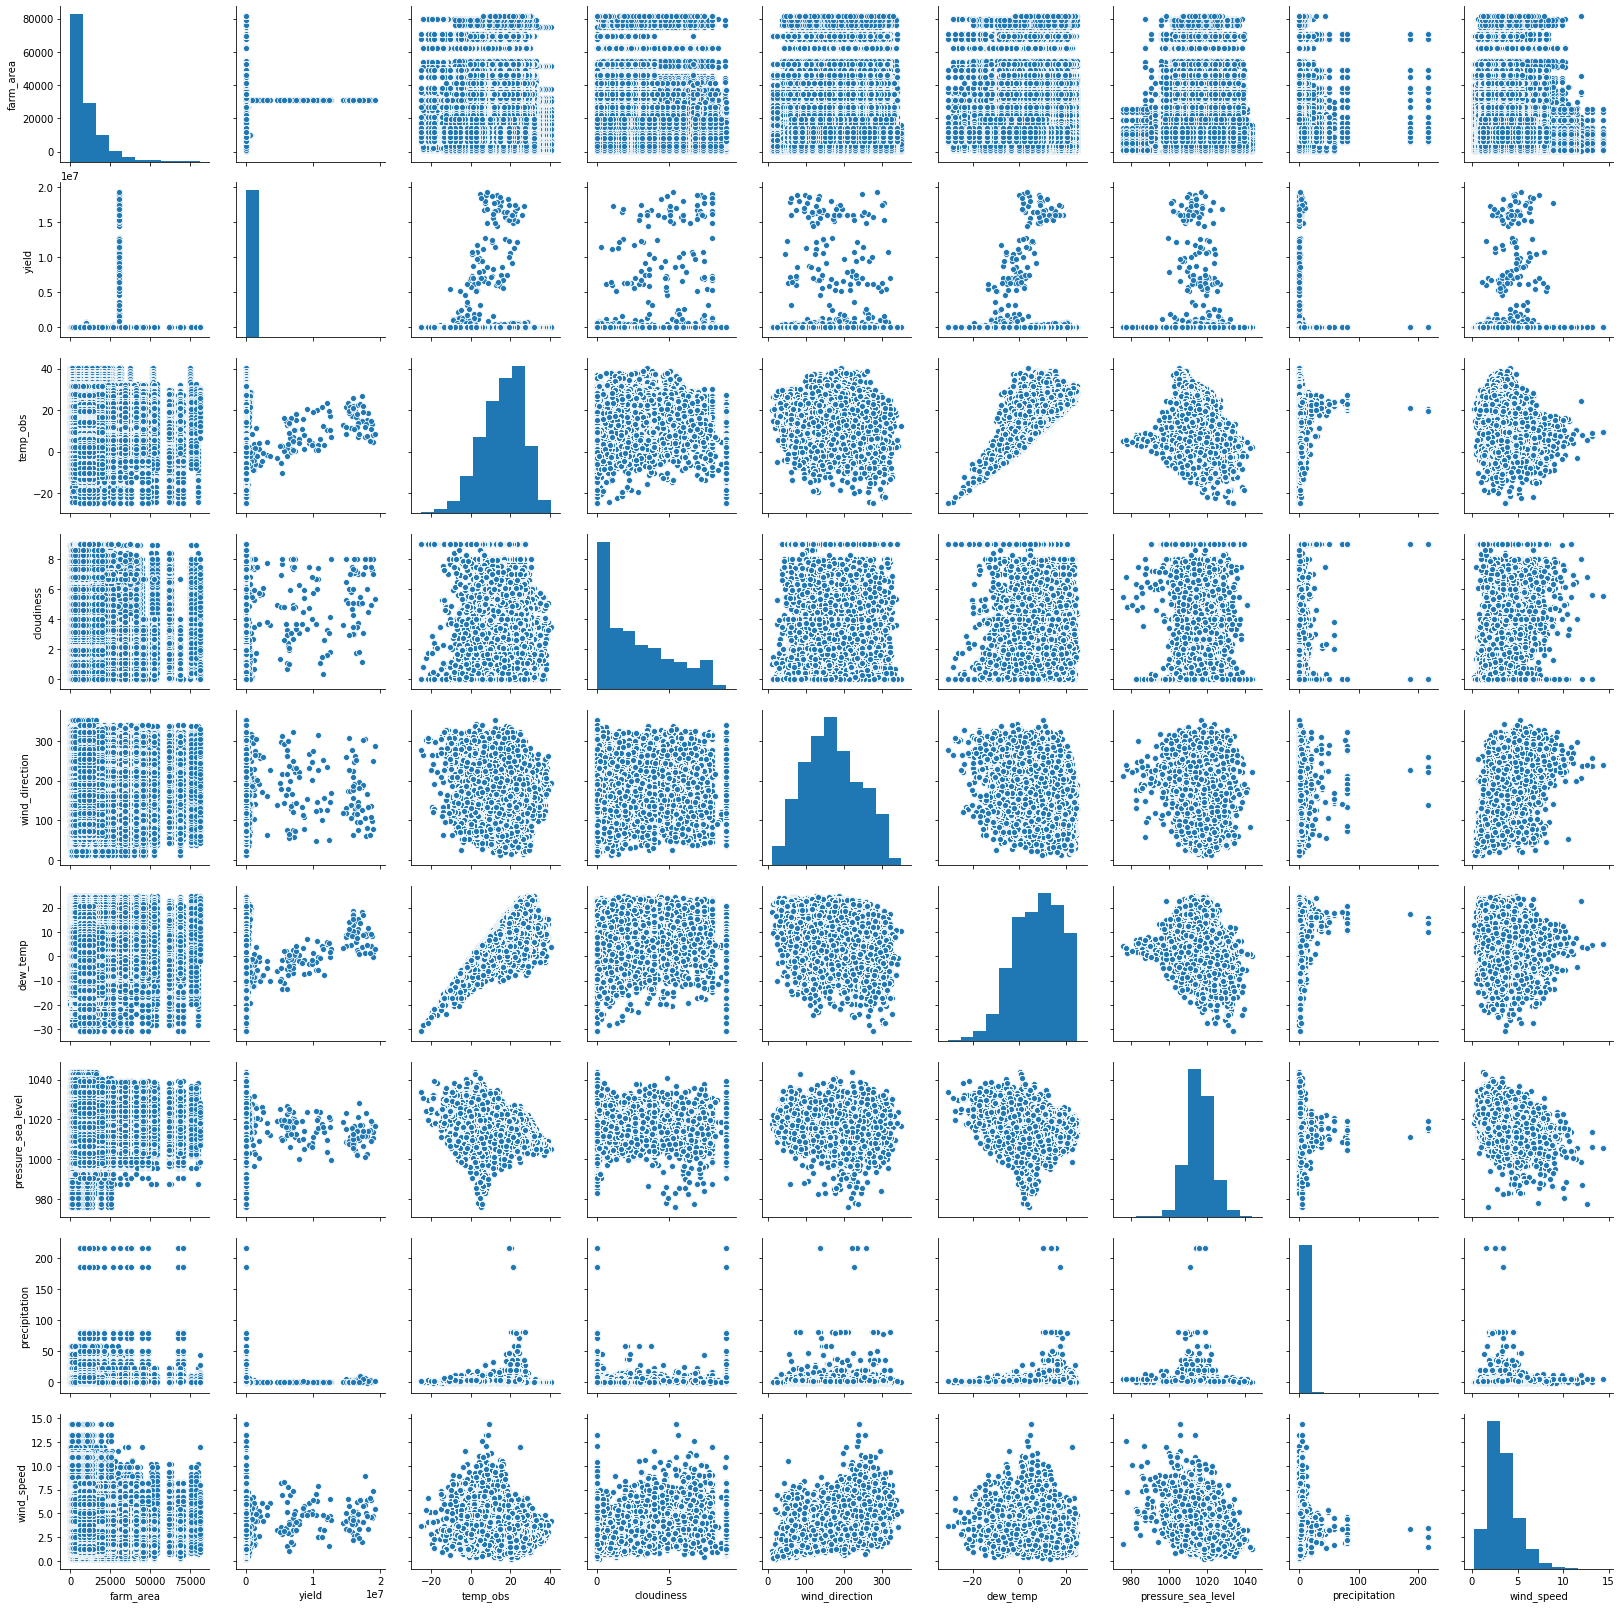

In [0]:
sns.pairplot(final_train)




*All of this informantion have explained above as pair plot have scatterplot and histogram which shows the spread of the data.*

**9. Barplot**

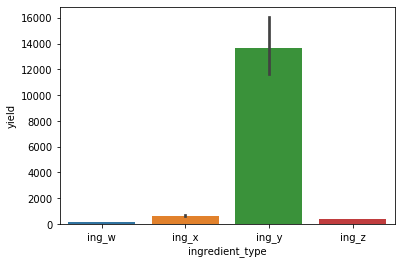

In [0]:
sns.barplot(x="ingredient_type", y="yield", data=final_train)



*Ingredient y shows highest relationship with the target. 
But the count of w was more than y which is quite suprising.*

**10 . Catplot**

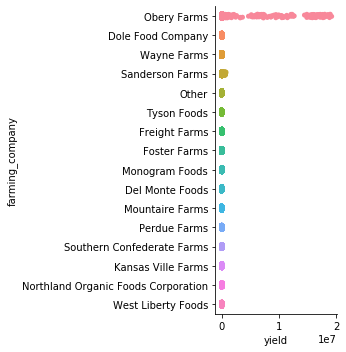

In [0]:
sns.catplot(x="yield",y="farming_company",data=final_train)


*As we knew Obey Farms had the highest count so it shows the strongest relationship with yield(target).*

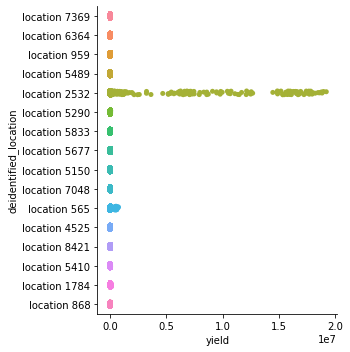

In [0]:
sns.catplot(x="yield", y="deidentified_location", data=final_train);


*Same in Unindentified location, location_2532 was the highest so it has the maximum with the target variable.*

In [0]:
final_train['Month'] = pd.DatetimeIndex(final_train['Date']).month 


**11. Line Plot**

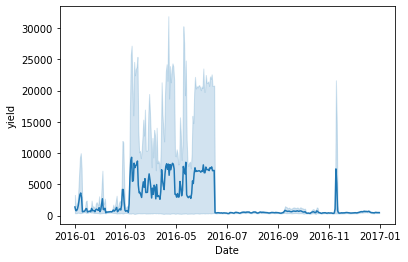

In [178]:
sns.lineplot(x="Date", y="yield", data=final_train)


*When we check the yield for the enitre year (2016) we can see the yielding pattern*


*   From March to June has the maximum yield. 
*   This can be the farming season in that particluar area.
*   There is no yield in the month of December, i think christmas might be the reason.


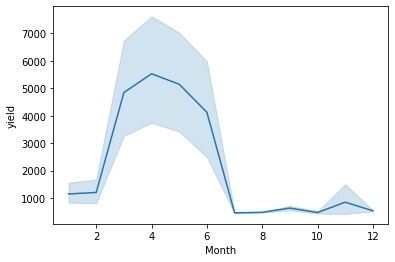

In [179]:
sns.lineplot(x="Month", y="yield", data=final_train)

*Here i check month wise relationship with the target.*


*   We can say farming season is from January ti June
*   Highest yeild comes in March to June.
*   July, August, September and October has almost no yield.
*   December has no yield to this can be termed as Seasonality.

